# Предсказание дефолта по кредиту

Многие люди берут кредит в банке. Некоторые не отдают. Если просрочка по кредиту больше 90 дней, банк считает, по данному кредиту произошел дефолт, то есть клиент не в состоянии его отдать.

Одна из первых задач, которую решало машинное обучение в банках, - предсказание дефолта.
Нужно по данным, которые предоставил потенциальный заемщик, определить, будет у него дефолт или нет.

Задача предсказания дефолта - задача классификации, а результат работы модели для конкретного клиента - предсказать произойдет дефолт или нет.
В этой тетради мы рассмотрим вопрос измерения качества работы обученных
классификаторов. На примерах мы опишем различные метрики качества и способы
их подсчёта. Также обратим внимание на адекватность их использования в типичных
практических кейсах.

<img src="https://drive.google.com/uc?id=1jQX02vTP_BKJIRPamIDRQ2U1Ub1NONNH" alt="Drawing" style="width: 50px;" width="360"/>

Мы попробуем на данных из Kaggle соревнования _"Give me some credit"_ обучить модель машинного обучения, которая будет предсказывать дефолт.
https://www.kaggle.com/c/GiveMeSomeCredit#description

**Бизнес-постановка задачи** 

Банк по анкетным данным оценивает вероятность того, что для конкретного клиента произойдет дефолт.
Применение модели ясно:
* мы хотим выдавать кредиты только хорошим заемщикам, которые отдадут кредит.

**Постановка задачи анализа данных** 

Целью данной задачи является построение модели *классификации дефолтов*: на вход модель будет принимать данные о клиенте, а на выходе она должна работать в двух режимах:
* выдавать вероятность дефолта для данного клиента,
* выдавать правильный с точки зрения модели класс клиента (есть у него дефолт или нет).

Обучать модель мы будем по данным с платформы kaggle.

**Обзор доступных данных**

В выборке 9900 наблюдений и 11 переменных, одна из которых - целевая. 
Таким образом, про каждого из 9900 клиентов мы знаем значения 11 их характеристик (возраст, доход в месяц), в том числе значение целевой переменной: есть ли у клиента сейчас просрочка более 90 дней.

Выборка была разбита на две части для обучения и для тестирования модели.
В обучающей выборке 4900 клиентов, в тестовой выборке - 5000.

**Доступные признаки**

Данные содержат два типа переменных:

* Целевая: **SeriousDlqin2yrs**, есть ли просрочка 90 дней и более
* Остальные переменные: 10 переменных, могут использоваться для прогноза целевой переменной.

| Имя столбца        | Значение |
| :-------------: |:-------------:|
| SeriousDlqin2yrs      | **Целевая переменная:** Есть ли просрочка 90 дней и более |
| RevolvingUtilizationOfUnsecuredLines      | Доля использованных лимитов по кредитным картам     |
| age | Возраст заемщика в годах |
| DebtRatio | Отношение суммы долговой нагрузки, расходов на жизнь и алименты к доходу |
| MonthlyIncome | Доход в месяц |
| NumberOfOpenCreditLinesAndLoans | Количество открытых кредитов и кредитных линий (кредитных карт) |
| NumberRealEstateLoansOrLines | Количество ипотек и других кредитных продуктов, связанных с недвижимостью |
| NumberOfTime30-59DaysPastDueNotWorse | Сколько раз за последние 2 года у заемщика была просрочка 30-59 дней |
| NumberOfTime60-89DaysPastDueNotWorse | Сколько раз за последние 2 года у заемщика была просрочка 60-89 дней |
| NumberOfTimes90DaysLate | Сколько раз за последние 2 года у заемщика была просрочка более 90 дней |
| NumberOfDependents | Количество иждивенцев в семье (супруг, дети и т.п.) |
	


## План анализа данных (data mining):

  1. Загрузить данные для обучения
  2. Обработать данные перед обучением модели
  3. Обучить модель на обучающей выборке
  4. Загрузить и предобработать данные для тестирования
  5. Провалидировать модель на тестовой выборке

## 1. Загрузить данные для обучения

**Шаг 1.1. Загружаем библиотеки** 


In [1]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid') # установить стиль whitegrid, другие стили можно найти в документации к seaborn

Некоторые библиотеки могут выводить на экран предупреждения, которые важно учитывать в "боевых" задачах. Но в учебной тетради мы укажем Python'у игнорировать их.

In [3]:
import warnings
warnings.filterwarnings("ignore")

**Шаг 1.2. Загрузим данные**

Для решения задачи мы будем использовать данные. Они состоят из двух частей: часть для обучения и часть для тестирования модели. Загружаем данные с помощие команды !wget. Для того, чтобы игнорировать сообщения в процессе загрузки используем магическую команду %%capture в первой строке.

In [4]:
%%capture
!wget https://www.dropbox.com/s/io67uppgq66plbp/training_data.csv
!wget https://www.dropbox.com/s/2ga9maqxbsf8xhg/test_data.csv

In [5]:
training_data = pd.read_csv('training_data.csv')

Посмотрим на 10 случайно выбранных записей из обучающего набора, для этого будем использовать функцию **sample()**. Параметр
**random_state=123** фиксирует "случайность", то есть на любом компьютере метод **sample()** будет работать одинаково. 

In [9]:
training_data.sample(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
17070,1,1.000000,52,1,0.575475,3000.0,5,5,0,0,2.0
7683,0,0.350235,42,0,1688.000000,NaN,8,0,1,0,0.0
7548,0,1.020455,51,3,0.228301,1900.0,8,0,0,0,1.0
23766,0,0.425681,56,0,0.192466,3875.0,7,0,0,0,1.0
3292,0,0.000000,80,0,2028.000000,NaN,3,0,1,0,0.0
2295,0,0.591173,63,0,0.352201,6200.0,13,0,2,0,1.0
10122,0,1.050585,49,3,0.748289,3360.0,13,0,1,0,0.0
3640,0,0.018535,52,0,1.068644,3000.0,12,0,1,0,0.0
40771,0,0.249536,49,2,0.237449,7150.0,12,0,2,0,2.0
14240,0,0.360941,44,0,1.489404,2500.0,4,0,1,0,2.0


**Шаг 1.3. Посмотрим общую статистику по данным**

Посмотрим на технические параметры загруженных данных для обучения. Для этого вызовем метод `describe()` для набора данных `training_data`

Для удобства отображения мы транспонируем результат: меняем местами столбцы и строки.

In [ ]:
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,50000.0,0.066860,0.249782,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,50000.0,7.927880,332.393142,0.0,0.030096,0.154426,0.555651,50708.0
age,50000.0,52.240520,14.766593,21.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,50000.0,0.428220,4.269296,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,50000.0,352.441921,2006.426016,0.0,0.176304,0.366811,0.862599,329664.0
MonthlyIncome,40147.0,6642.232222,18122.708690,0.0,3400.000000,5400.000000,8250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,50000.0,8.476040,5.172756,0.0,5.000000,8.000000,11.000000,57.0
NumberOfTimes90DaysLate,50000.0,0.269920,4.243110,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,50000.0,1.017500,1.120151,0.0,0.000000,1.000000,2.000000,32.0
NumberOfTime60-89DaysPastDueNotWorse,50000.0,0.246040,4.231055,0.0,0.000000,0.000000,0.000000,98.0


Обратим внимание на общие статистики показателей в данных:
* **count** -- количество значений, которые не являются пропущенными (`NaN`);
* **mean**, **std** -- среднее и разброс данных в соответствующем поле;
* остальные статистики -- минимальное и максимальное значения, и квантили.

Из таких характеристик столбцов мы уже можем извлечь некоторую информацию о данных:
* У столбца **SeriousDlqin2yrs** среднее 0.060. Значит, в нашей выборке только у 6% клиентов есть дефолт.
* У столбца **MonthlyIncome** заполнено только 3947 значений из 4900. Минимальное значение дохода - 0, максимальное - 208333.
* У столбца **NumberOfDependents** больше половины значений - нулевые.

# 2. Обработать данные перед обучением модели

**Шаг 2.1. Проверяем данные на наличие пропусков и типов переменных**

Начнем с проверки общей информации о данных.
Для того чтобы это сделать, нужно обратиться вызвать у переменной *training_data* метод **info()**.

Напомним, что в конце необходимо поставить скобочки.

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      50000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  50000 non-null  float64
 2   age                                   50000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  50000 non-null  int64  
 4   DebtRatio                             50000 non-null  float64
 5   MonthlyIncome                         40147 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       50000 non-null  int64  
 7   NumberOfTimes90DaysLate               50000 non-null  int64  
 8   NumberRealEstateLoansOrLines          50000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  50000 non-null  int64  
 10  NumberOfDependents                    48667 non-null  float64
dtypes: float64(4), 

Метод `info()` выводит информацию о таблице типа `pd.DataFrame`, включая формат `dtype` и `dtypes` столбца, ненулевые значения и использование памяти.

**Шаг 2.2. Заполнение пропусков**

Рассчитаем средние значения признаков в обучающей выборке, и заполним полученными
числами пропуски как в **тестовом наборе** данных, так и в **самой обучающей выборке**.

Мы будем заполнять средними значениями из обучающей выборки, так как при решении реальной задачи нам будут доступны только данные для обучения.

Для получения средних значений вызовем метод `mean()`. По умолчанию метод считает средним значения по столбцам. После выполнения ячейки средние значения записаны в переменной `train_mean`



In [11]:
train_mean = training_data.mean()
train_mean

SeriousDlqin2yrs                           0.066860
RevolvingUtilizationOfUnsecuredLines       7.927880
age                                       52.240520
NumberOfTime30-59DaysPastDueNotWorse       0.428220
DebtRatio                                352.441921
MonthlyIncome                           6642.232222
NumberOfOpenCreditLinesAndLoans            8.476040
NumberOfTimes90DaysLate                    0.269920
NumberRealEstateLoansOrLines               1.017500
NumberOfTime60-89DaysPastDueNotWorse       0.246040
NumberOfDependents                         0.756180
dtype: float64

Пропуски в данных можно заполнять и разными методами:
* выборочной статистикой (среднее, медиана);
* прогнозами регрессии по известыми признакам;
* случайными значениями.

Если относительно небольшая доля наблюдению имеет пропуски, то можно
вовсе исключить неполные наблюдения с пропущенными значениями из выборки.

Для заполнения средним значеним, передадим на вход методу `fillna` полученный ранее набор средних значений для каждого столбца. Опция `inplace=True` говорит, что мы запишем изменения прямо в существующий массив, а не создадим новый.

In [12]:
training_data.fillna(train_mean, inplace=True)

In [ ]:
training_data.shape

(50000, 11)

**Шаг 2.3. Работаем с целевой переменной**

*Какая переменная целевая?*

В данном случае по условию задачи мы должны прогнозировать дефолт, поэтому целевая переменная - это наличие дефолта. 

In [13]:
target_variable_name = 'SeriousDlqin2yrs'

Обратим внимание на целевой признак **SeriousDlqin2yrs** -- наличие серьёзной просрочки
по кредитным выплатам за последние два года. Обычно заёмщики стараются производить выплаты
вовремя.

Чтобы посчитать количество хороших заемщиков без больших просрочек (значение переменной **SeriousDlqin2yrs** равно нулю) и плохих с просрочкой (значение **SeriousDlqin2yrs** равно единице) вызовем метод `value_counts()`

In [14]:
training_data[target_variable_name].value_counts()

0    46657
1     3343
Name: SeriousDlqin2yrs, dtype: int64

Нам нужно выделить в отдельную переменную *training_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной. Для этого мы у таблицы *training_data* в квадратных скобках указываем имя нужного столбца. В нашем случае это имя записано в переменной *target_variable_name*. 

In [15]:
training_values = training_data[target_variable_name]

Проверим размерность целевой переменной

In [ ]:
training_values.shape

(50000,)

Запись `(50000,)` равносильна `(50000, 1)`.  Она означает, что у нас 50000 столбцов (экземпляров в выборке) и 1 колонка (признак)

Отделим входные переменные от выходной (целевой), чтобы можно было построить модель предсказания целевой переменной по входным. Для это нужно у переменной training_data вызвать метод drop().

In [20]:
training_points = training_data.drop(target_variable_name, axis=1)

In [ ]:
training_data.shape

(50000, 11)

In [ ]:
training_points.shape

(50000, 10)

Видно, что столбца действительно нет, а количество строк не изменилось. 

##   3. Обучить модель на обучающей выборке

**Шаг 3.1. Выбираем метод, который будем использовать**

Проще всего начать с простых методов. 
Мы воспользуемся одним методом для построения моделей классификации. Можно было всё известные нам методы и сравним их между собой:
* kNN
* Деревья решений 
* Случайный лес *random forest*

В этом конкретном примере мы будем работать только со случайным лесом. 

Мы импортируем модуль *ensemble* - тут находятся модели на основе ансамблей.

In [22]:
from sklearn import ensemble

Чтобы создать модель случайного леса, пишем имя модуля ensemble, затем точку, затем название модели. 

Для этого нужно выполнить следующий код:

```python
random_forest_model = ensemble.RandomForestClassifier()
random_forest_model
```

Нам нужна модель для классификации `RandomForestClassifier` (для регрессии используется `RandomForestRegressor`).

Результат выполнения должен быть следующим:
    
```python
RandomForestClassifier(bootstrap=True, class_weight=None, 
            criterion='gini', max_depth=None, max_features='auto', 
            max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', 
            n_jobs=None, oob_score=False, random_state=None, 
            verbose=0, warm_start=False)
```

In [30]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators=100)

In [18]:
random_forest_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

У модели классификации на основе случайного леса много гиперпараметров. Рассмотрим некоторые из них:
* параметр *n_estimators* определяет, сколько деревьев в лесу,
* в параметре *max_depth* устанавливается, какая максимальная глубина у дерева,
* в параметре *min_samples_leaf* задается, какое максимальное число объектов может попасть в лист дерева.

**Шаг 3.2. Обучить модель**

Теперь, когда мы создали прототипы обеих моделей, можем их обучить с помощью обучающей выборки. 

Для этого вызываем метод **fit()** у каждой модели и передаем ему на вход два аргумента: 
таблицу входных признаков и столбец значений целевой переменной - (training_points, training_values)

In [31]:
random_forest_model.fit(training_points, training_values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

* Теперь необходимо провалидировать модель на новых тестовых данных, которые не использовались при обучении модели.

## 4. Загрузить и предобработать данные для тестирования

**Шаг 4.1. Загрузим данные для тестирования**


In [24]:
test_data = pd.read_csv('test_data.csv')

**Шаг 4.2. Предобработка данных для тестирования**

Тестовые данные нужно предобработать аналогично обучающим. Поэтому заполним сперва пропуски в данных.

Для заполнения средним значеним, передадим на вход методу `fillna` полученный ранее набор средних значений для каждого столбца. Опция `inplace=True` говорит, что мы запишем изменения прямо в существующий массив, а не создадим новый

In [25]:
test_data.fillna(train_mean, inplace=True)

**Шаг 4.3. Отделяем целевую переменную**

Нам нужно выделить в отдельную переменную *test_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной. Для этого мы у таблицы *test_data* в квадратных скобках указываем имя нужного столбца. В нашем случае это имя записано в переменной *target_variable_name*. 

In [26]:
test_values = test_data[target_variable_name]

И проверяем результат записанный в test_points

In [27]:
test_points = test_data.drop(target_variable_name, axis=1)

In [28]:
test_points.shape

(37500, 10)

# 5. Провалидировать модель на тестовой выборке

Сначала получим прогноз модели на тестовых данных *`test_points`*, 
для этого запустим метод **`predict()`**.

In [32]:
test_predictions_random_forest = random_forest_model.predict(test_points)

In [33]:
test_predictions_random_forest

array([0, 1, 0, ..., 0, 0, 0])

In [34]:
test_values

0        0
1        1
2        0
3        0
4        1
        ..
37495    0
37496    0
37497    0
37498    0
37499    0
Name: SeriousDlqin2yrs, Length: 37500, dtype: int64

Посмотрим, сколько предсказаний каждого вида (дефолтов и возвратов кредитов) спрогнозировала модель. Для этого необходимо вызвать функцию **`value_counts()`** из библиотеки **`pandas`** для полученных прогнозов.

In [ ]:
pd.value_counts(test_predictions_random_forest)

0    36631
1      869
dtype: int64

### Шаг 5.1. Точность прогноза

Естественный способ измерить качество модели - посчитать долю правильных предсказаний, то есть, сколько в процентном соотношении от размера тестовой выборки модель угадала единичек и сколько угадала ноликов. Такая метрика называется точность (accuracy). 

<img src="https://drive.google.com/uc?id=1ITTp5pCtDKszhkkLXzXiuCWi09VJaioA" alt="Drawing" style="width: 600px;"/>

Функция для подсчета точности реализована в библиотеке **sklearn** и называется **`accuracy_score()`**. Импортируем её. 

In [35]:
from sklearn.metrics import accuracy_score

В функцию **`accuracy_score()`** необходимо передать два аргумента:
* истинные значения меток - *test_values*
* предсказания модели - *test_predictions_random_forest*

In [36]:
print(accuracy_score(test_values, test_predictions_random_forest))

0.9342133333333333


**Как понять, хорошо работает модель или нет?**

Из значения точности мы никак не можем понять, сколько меток каждого класса правильно предсказала модель. В нашей задаче мало значений с классом 1 (дефолт), но много 0 (возврат кредита). Может быть такая ситуация, когда модель очень хорошо научилась выделять характеристики большого класса, в нашем случае 0, но совсем не умеет выделять характеристики маленького класса. А часто именно последние в большей степени интересуют аналитиков. 

Самый простой способ проверить - это сравнить значения точности для наших моделей с точностью для константного классификатора, модели, которая всегда бы предсказывала больший класс, в нашем случае 0. 
Для этого можно в функцию **`accuracy_score()`** в качестве второго аргумента передать массив нулей такого же размера, как и *test_values*. Это делается с помощью функции **`zeros_like()`** из библиотеки numpy, у которой один аргумент - *test_values*, массив с размером которого будет создан массив нулей. 

In [ ]:
print(accuracy_score(test_values, np.zeros_like(test_values)))

0.9326133333333333


Действительно, точность очень близка к точности константного классификатора. Это не означает, что модель работает определенно плохо, но необходимо проверить дополнительные метрики. 

### Шаг 5.2. Таблица сопряженности модели классификации

Другой способ оценивать качество работы классификатора - использовать таблицу сопряженности. 

**Таблица сопряжённости** (матрица неточности, или Confusion matrix) содержит сводные показатели качества работы классификатора. **Строки** этой таблицы соответствуют **фактическим классам** тестового набора, а **столбцы** - **предсказанным** классификатором меткам.

Импортируем функцию для построения таблицы сопряженности из библиотеки **`sklearn`**.

In [ ]:
from sklearn.metrics import confusion_matrix

Таблица содержит четыре сводных показателя, каждый из которых отражает количество объектов в одной и четырех
категорий: 
* **истинно позитивный** (*True positive*, **TP**) -- объект
класса `1` был верно помечен меткой `1`;
* **ложно позитивный** (*False positive*, **FP**) -- объект
фактически принадлежит классу `0`, но помечен меткой `1`;
* **истинно отрицательный** (*True negative*, **TN**) -- классификатор
верно определил, что объект класса `0` принадлежит классу `0`;
* **ложно отрицательный** (*False negative*, **FN**) -- классификатор
пометил объект меткой `0`, однако на самом деле объект принадлежит классу `1`.


Замечание: ошибки False positive часто называют **ложной тревогой**, а False negative - **пропуском цели**. 

|                   |  Предсказано `0` |  Предсказано `1` |
|:-------------------|:------------------|:------------------|
|**Фактически** `0`  |       TN         |       FP         |
|**Фактически** `1`  |       FN         |       TP         | 

Посмотрим на таблицу сопряженности для случайного леса. Для этого в функцию **`confusion_matrix()`** необходимо передать два аргумента:
* истинные значения меток - *test_values*
* предсказания модели - *test_predictions_random_forest*

Далее для удобства мы запишем полученную матрицу в удобный табличный вид, воспользовавшись функцией **`DataFrame()`** из библиотеки **pandas**. 

In [ ]:
random_forest_confusion_matrix = confusion_matrix(test_values, test_predictions_random_forest)
random_forest_confusion_matrix = pd.DataFrame(random_forest_confusion_matrix)

random_forest_confusion_matrix

,0,1
0,34565,408
1,2066,461


Разберем полученные значения подробнее:

<img src="https://drive.google.com/uc?id=1xBlpY2UwXy94IYxAme4OXZxxaNm57A3x" alt="Drawing" style="width: 400px;" width="700"/>


Почему значения на картинке отличаются от тех, которые мы получили?

`random_seed` не был зафиксирован в модели Случайных лесов, и мы видим незначительные отклонения в результатах предсказания.

### ROC кривая классификатора

Если хотят сравнить метрики на разных наборах данных, обычно работают не с абсолютными значениями True Positive и False Positive, а с их долями:

* Доля ложноположительных срабатываний $\text{FPR} = \frac{FP}{FP + TN}$;
* Доля истинно положительных срабатываний $\text{TPR} = \frac{TP}{TP + FN}$.

Заметим, что $FP + TN$ дает общее число объектов класса $0$, а $TP + FN$ - общее число объектов класса $1$. 

Одной из самых популярных метрик для задачи классификации является ROC кривая. ROC расшифровывается как *Receiver Operating Characteristic*. Эта кривая наглядно показывает зависимость доли истинно позитивных срабатываний (**TPR**) от доли ложно позитивных срабатываний (**FPR**) при изменении порога классификации.

Функция **roc_curve()** из **scikit-learn** позволяет получить координаты точек ROC кривой, а также значения порога **threshold**, при котором достигается соответствующие значения метрик **FPR** и **TPR**.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html 

На вход функции **roc_curve()** необходимо передать два аргумента:
* истинные значения меток - *test_values*
* вероятности, предсказанные моделью - *test_probabilities*

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
test_probabilities = random_forest_model.predict_proba(test_points)

In [ ]:
fpr, tpr, threshold = roc_curve(test_values, test_probabilities[:,1])

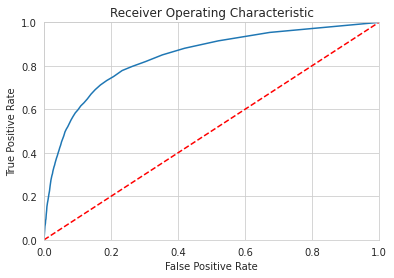

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Чем ближе в целом кривая **ROC** к **левому верхнему** углу, тем лучше качество классификации.

Несмотря на наглядность, иногда требуется некоторое число, обобщающее весь
график. Для ROC кривой таким числом является "площадь под кривой" (**ROC-AUC**). 

В **sklearn** есть специальная функция **roc_auc_score()** для подсчёта
площади под ROC-кривой. 

In [ ]:
from sklearn.metrics import roc_auc_score

Типичная шкала для **ROC-AUC** (часто все зависит от задачи):
* $0.90$ - $1.00$ отлично;
* $0.80$ - $0.90$ хорошо;
* $0.70$ - $0.80$ удовлетворительно;
* $0.60$ - $0.70$ плохо;
* $0.50$ - $0.60$ очень плохо;
* $0.00$ - $0.50$ классификатор перепутал метки.

In [ ]:
roc_auc_value = roc_auc_score(test_values, test_probabilities[:,1])

print("ROC-AUC на тестовой выборке:", roc_auc_value) 

ROC-AUC на тестовой выборке: 0.8413446730249966


# Решение imbalance

Выше отмечали, что у нас данные несбалансированные. Можно попробовать сбалансировать их. Например, с помощью SMOTE.

SMOTE - алгоритм балансировки классов. Подробнее: https://vc.ru/ml/129738-algoritm-balansirovki-klassov-smote

Здесь качество не улучшилось.


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from collections import Counter

In [ ]:
Counter(training_values)

Counter({0: 46657, 1: 3343})

In [ ]:
sm = SMOTE(random_state=42)

In [ ]:
X_res, y_res = sm.fit_resample(training_points, training_values)

In [ ]:
Counter(y_res)

Counter({0: 46657, 1: 46657})

In [ ]:
random_forest_model.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test_predictions_random_forest = random_forest_model.predict(test_points)

In [ ]:
print(accuracy_score(test_values, test_predictions_random_forest))

0.93168


In [ ]:
test_probabilities = random_forest_model.predict_proba(test_points)

In [ ]:
fpr, tpr, threshold = roc_curve(test_values, test_probabilities[:,1])

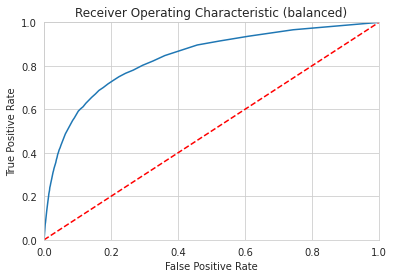

In [ ]:
plt.title('Receiver Operating Characteristic (balanced)')
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
roc_auc_value = roc_auc_score(test_values, test_probabilities[:,1])

print("ROC-AUC на тестовой выборке:", roc_auc_value) 

ROC-AUC на тестовой выборке: 0.8360542047864591
